In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def print_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest', aspect='auto')

In [5]:
def FLD(image):
    e1 = cv2.getTickCount()
    # Create default Fast Line Detector class
    fld = cv2.ximgproc.createFastLineDetector()
    # Get line vectors from the image
    lines = fld.detect(image)
    e2 = cv2.getTickCount()
    print('FLD time: ', (e2 - e1)/ cv2.getTickFrequency())
    # Draw lines on the image
    line_on_image = fld.drawSegments(image, lines)
    
    return line_on_image

(345, 487, 3)
(345, 487)
FLD time:  0.007276602
(345, 487, 3)


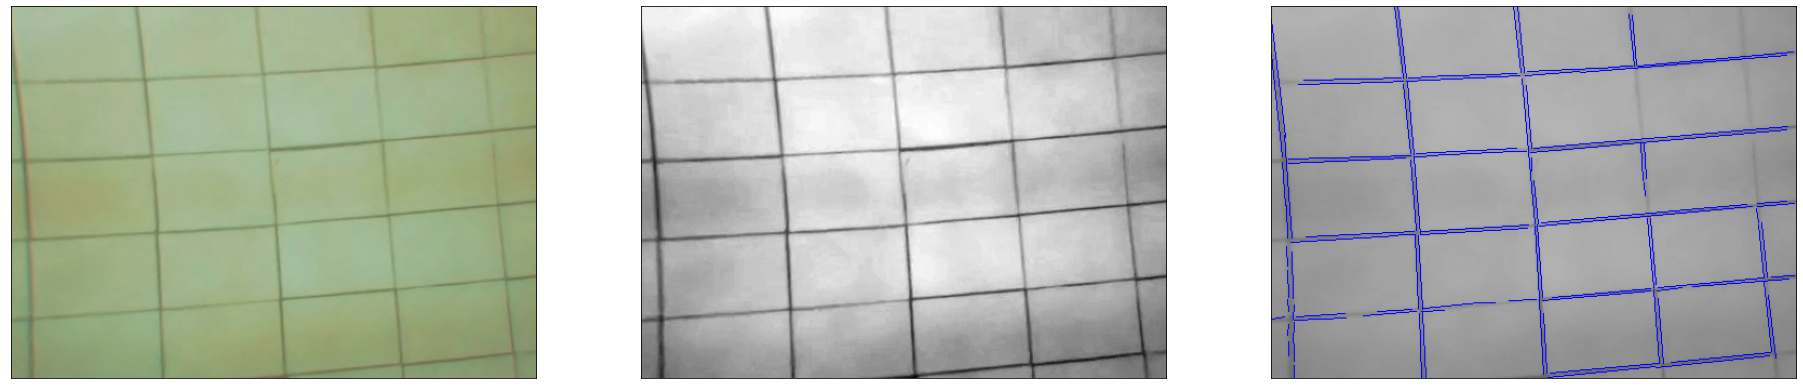

In [6]:
IMAGE_PATH = '../images/calib/frame_0.jpg'

img = cv2.imread(IMAGE_PATH)
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)

img_with_lines = FLD(gray)
print(img_with_lines.shape)

images = [img, gray, img_with_lines]

fig = plt.figure(figsize=(32,24))

for i in range(len(images)):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

In [7]:
def rotate(image, angle):
    rows,cols = image.shape
    # cols-1 and rows-1 are the coordinate limits.
    M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

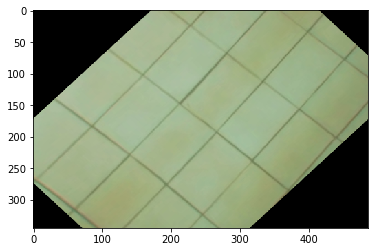

In [8]:
rotated = rotate(gray, 45)
print_image(rotated)

In [9]:
def adaptive_threshold(image):
    e1 = cv2.getTickCount()
    th = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    e2 = cv2.getTickCount()
    print('adaptive_threshold time: ', (e2 - e1)/ cv2.getTickFrequency())
    return th
    

In [10]:
def otsu_threshold(image):
    ret3,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return otsu

adaptive_threshold time:  0.00805627
FLD time:  0.021379223
0.052823709


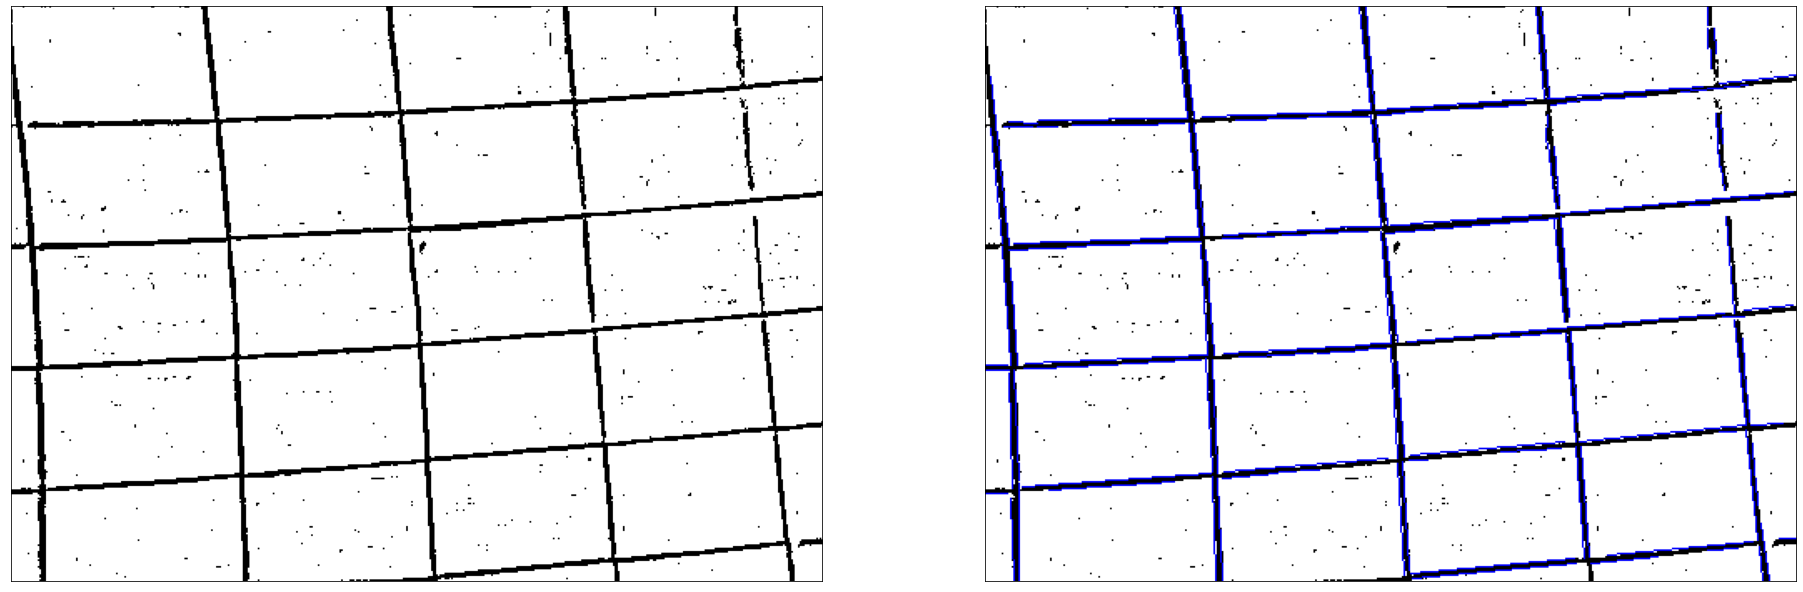

In [11]:
e1 = cv2.getTickCount()

th = adaptive_threshold(gray)
th_lines = FLD(th)

e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

images = [th, th_lines]

fig = plt.figure(figsize=(32,24))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')


In [12]:
def gauss_blur(image):
    e1 = cv2.getTickCount()
    blur = cv2.GaussianBlur(image,(5,5),0)
    e2 = cv2.getTickCount()
    print('gauss_blur time: ', (e2 - e1)/ cv2.getTickFrequency())
    return blur

In [13]:
def bilaterial_filter(image):
    e1 = cv2.getTickCount()
    blur = cv2.bilateralFilter(image,9,75,75)
    e2 = cv2.getTickCount()
    print('bilaterial filter time: ', (e2 - e1)/ cv2.getTickFrequency())
    return blur

gauss_blur time:  0.002595191
adaptive_threshold time:  0.002650513


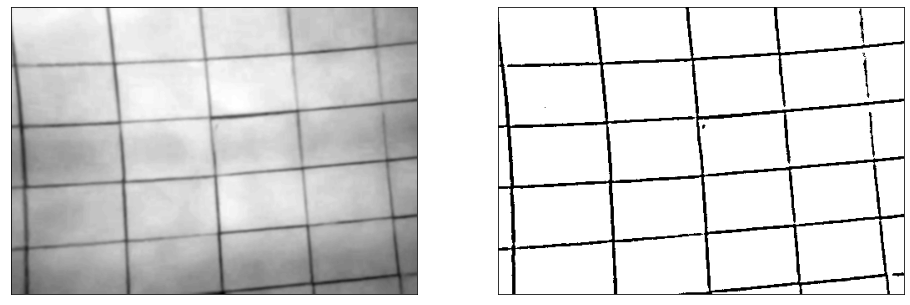

In [14]:
blur = gauss_blur(gray)
th = adaptive_threshold(blur)


images = [blur, th]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

In [15]:
def opening_joints(image):
    kernel = np.ones((15,15),np.uint8)
    e1 = cv2.getTickCount()
    opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
    e2 = cv2.getTickCount()
    print('opening_joints time: ', (e2 - e1)/ cv2.getTickFrequency())
    return opening

opening_joints time:  0.001372359


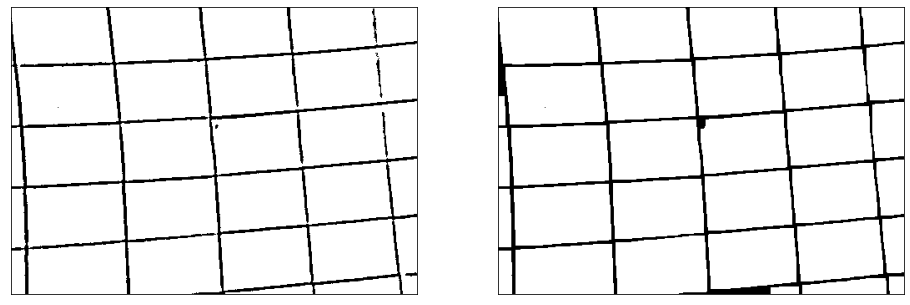

In [16]:
opening = opening_joints(th)
images = [th, opening]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

In [17]:
def canny_detector(image):
    e1 = cv2.getTickCount()
    edges = cv2.Canny(image,50,150,apertureSize = 3)
    e2 = cv2.getTickCount()
    print('canny_detector time: ', (e2 - e1)/ cv2.getTickFrequency())
    return edges

In [18]:
def HLD(image):
    e1 = cv2.getTickCount()
    lines = cv2.HoughLines(image,1,np.pi/180,300)
    e2 = cv2.getTickCount()
    print('HLD time: ', (e2 - e1)/ cv2.getTickFrequency())

    return lines

canny_detector time:  0.004699666
HLD time:  0.011628564
HLD time:  0.020018713
lines none
24


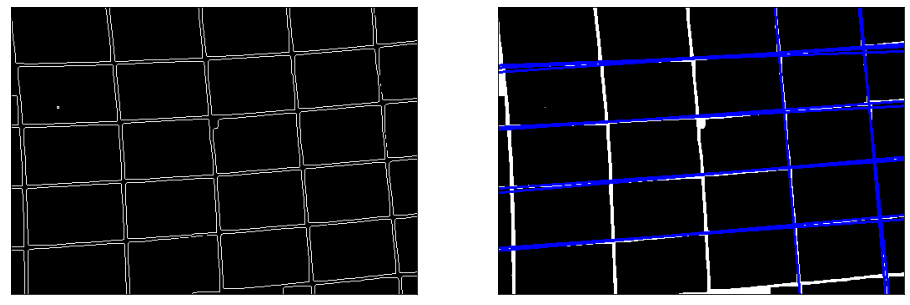

In [19]:
image = cv2.imread(IMAGE_PATH)
img_th = cv2.imread(IMAGE_PATH)
canny = canny_detector(opening)
bitwise = cv2.bitwise_not(opening)

lines = np.array([])
lines_th = np.array([])
lines = HLD(canny)
lines_th = HLD(bitwise)

bitwise = cv2.cvtColor(bitwise,cv2.COLOR_GRAY2RGB)
canny = cv2.cvtColor(canny,cv2.COLOR_GRAY2RGB)
if str(type(lines)) == "<class 'NoneType'>":
    print('lines none')
elif lines.size > 0:
    print(lines.size)
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(canny,(x1,y1),(x2,y2),(0,0,255),2)
if str(type(lines_th)) == "<class 'NoneType'>":
    print('lines_th none')
elif lines_th.size > 0:
    print(lines_th.size)
    for line in lines_th:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(bitwise,(x1,y1),(x2,y2),(0,0,255),2)

images = [canny, bitwise]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

In [104]:

a = lines_th.copy()
a.ravel()
a.shape = (a.shape[0], a.shape[2])
print(a)
print(a.shape)
print(a[a[:,1].argsort()])

[[ 292.           1.4835298]
 [ 148.           1.5009831]
 [  74.           1.5184364]
 [ 218.           1.5009831]
 [ 223.           1.4835298]
 [ 145.           1.5184364]
 [-331.           3.054326 ]
 [  79.           1.5009831]
 [-430.           3.0368729]
 [  71.           1.5358897]
 [ 289.           1.5009831]
 [-433.           3.054326 ]]
(12, 2)
[[ 292.           1.4835298]
 [ 223.           1.4835298]
 [ 148.           1.5009831]
 [ 218.           1.5009831]
 [  79.           1.5009831]
 [ 289.           1.5009831]
 [  74.           1.5184364]
 [ 145.           1.5184364]
 [  71.           1.5358897]
 [-430.           3.0368729]
 [-331.           3.054326 ]
 [-433.           3.054326 ]]


In [105]:
vertical_lines = []
horizontal_lines = []
for line in a:
    line[1] *= 180/np.pi
    if (line[1] < 45) | (line[1] > 135):
        vertical_lines.append(line.astype(int))
    else:
        horizontal_lines.append(line.astype(int))
vertical_lines = np.array(vertical_lines)
horizontal_lines = np.array(horizontal_lines)
print(vertical_lines)
print(horizontal_lines)


[[-331  174]
 [-430  174]
 [-433  174]]
[[292  85]
 [148  86]
 [ 74  87]
 [218  86]
 [223  85]
 [145  87]
 [ 79  86]
 [ 71  88]
 [289  86]]


In [106]:
max_difference = np.absolute(np.diff(horizontal_lines[horizontal_lines[:,0].argsort()][:,0], axis=0)).max()
print(max_difference)
print(horizontal_lines)
print(vertical_lines)

70
[[292  85]
 [148  86]
 [ 74  87]
 [218  86]
 [223  85]
 [145  87]
 [ 79  86]
 [ 71  88]
 [289  86]]
[[-331  174]
 [-430  174]
 [-433  174]]
